# <span style="color:purple">**CS 39AA-Project Part 2**</span>



In part 1 we did an exploratory analysis of the data, in this second part we will do a quick and dirty baseline model.

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np# linear algebra
import re
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import warnings
warnings.simplefilter("ignore")
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import the dataset
data_URL = "../input/language-detection/Language Detection.csv"
df = pd.read_csv(data_URL)
print(f"df.shape: {df.shape}")
#A change in the default display width for a pandas dataframe column
pd.set_option("display.max_colwidth", 240)
df

/kaggle/input/language-detection/Language Detection.csv
df.shape: (10337, 2)


,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒಳ್ಳೆಯದನ್ನು ನೀಡೋಣ.,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್ನು ಬದಲಾಯಿಸಿದಳು ಆದರೆ ನಿಧಾನವಾಗಿ ಮತ್ತು ತಾಳ್ಮೆಯಿಂದ ಅವಳು ಒಂದು ದಿನ ಮೆಲ್ಲಿ ಆಗಲು ಪ್ರಾರಂಭಿಸಿದಳು ಮೆಲ್ಲಿ ಮತ್ತು ಟೆರ್ರಿ ಮತ್ತೆ ಮರಿಯನ್ ಅವರನ್ನು ಭೇಟಿಯಾಗಲು ಬಂದರು ಓಹ್ ಹಲೋ ನೀವಿರಿ ಆದ್ದರಿಂದ ನಮಗೆ ಮರಿಯನ್ ಹೇಳಿ.,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.,Kannada


### <span style="color:green">**Data cleanup**</span>
Better Tokenization

In [2]:

#Let's convert the 'Text' column to string format in case there is some data not in string format.
df['Text']= df['Text'].astype(str)

#Let's delete any row that might have missing text
df=df[~df['Text'].isnull()]

#This removes any characters that are not letters or numbers
df['preprocessed_text'] = df['Text'].str.replace('\W',' ') 

#Convert to lower case
df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove numbers
df['preprocessed_text'] = df['preprocessed_text'].str.replace('\d+','')

#Remove duplicate text
df.drop_duplicates(subset=['Text'],keep='first',inplace=True)

Recall the distribution of the sample text across the 17 languages. 

In [3]:
df['Language'].value_counts()

English       1382
French        1006
Spanish        815
Portugeese     736
Italian        694
Russian        688
Sweedish       672
Malayalam      591
Dutch          541
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

In [4]:
#Separate independent and dependent features
X=df['preprocessed_text']
y=df['Language']

### <span style="color:green">**Label Encoding & Bag of words**</span>
Vectorization

In [5]:
#After cleaning up the data, we need to convert the tokens into 
#a numerical representation, so we are perfomrming label encoding 
#on the categorical labels(Languages). This will allow us to be 
#able to use many different types of models, including neural networks.

le = LabelEncoder()
y = le.fit_transform(y)

# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in df['preprocessed_text']:
        # appending to data_list
        data_list.append(text)
        
#The sample text should be in a numerical representation as well. 
#So we are converting the sample text into numerical representation
#by creating a Bag of Words model.
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10267, 39390)

(10267, 39390)

### <span style="color:green">**Training set & Testing set**</span>

Modeling Process/Evaluation

Accuracy is : 0.9756572541382668


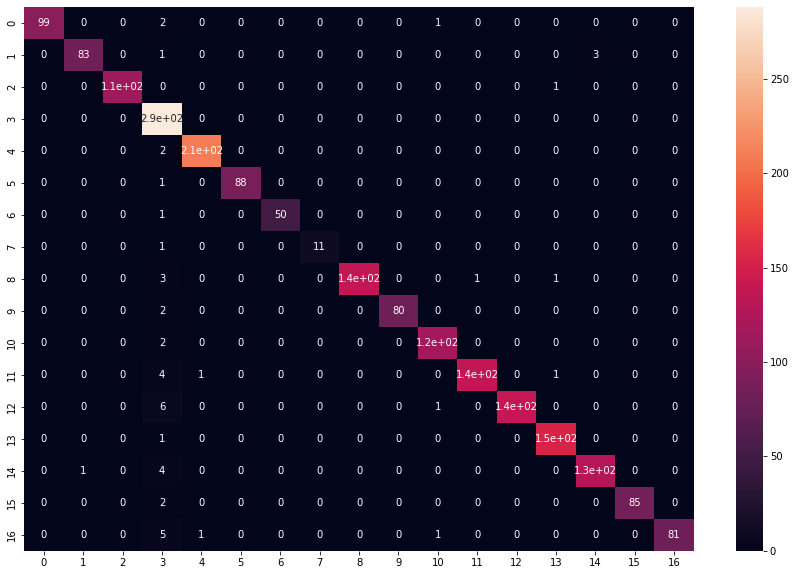

In [6]:
#We need to compare our model performance metrics to
#a suitable baseline. We don't have a validation and/or test set 
#right now. We need to remove a portion of the dataset from the 
#'training',then evaluate our model against this.

#We need to create the training set to train the model and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#We will use the Naive Bayes algotrithm for our model
model = MultinomialNB()
model.fit(x_train, y_train)

#Let's predict the output for the test set
y_pred = model.predict(x_test)

#Let's evaluate our model and create the confusion matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

#We plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()


In [7]:
#Function to predict a language
def predict(text):
     x = cv.transform([text]).toarray() # converting the input text to a bag of words model
     language = model.predict(x) # predicting the language
     language = le.inverse_transform(language) # finding the language corresponding the the predicted value
     print("The language is in",language[0]) # printing the language

In [8]:
#Evaluating our function
predict('Hola como estas?')
predict('Hi how are you?')
predict('Hola como mademoiselle?')
predict('Hola bonjour mademoiselle?')

The language is in Spanish
The language is in English
The language is in Spanish
The language is in Spanish
